# Dfs0 - Relative time axis

MIKE IO typically uses a pandas DatetimeIndex to represent the time dimension in dfs files. If the Dfs file has a relative time axis it will be instead use a TimeDeltaIndex

In [1]:
import mikeio

In [2]:
ds = mikeio.read("../tests/testdata/eq_relative.dfs0")
ds

<mikeio.Dataset>
dims: (time:504)
time: 0 days 00:00:00 - 0 days 00:00:56.236909 (504 non-equidistant records)
geometry: GeometryUndefined()
items:
  0:  Item 1 <Undefined> (undefined)
  1:  Item 2 <Undefined> (undefined)
  2:  Item 3 <Undefined> (undefined)
  3:  Item 4 <Undefined> (undefined)
  4:  Item 5 <Undefined> (undefined)

<Axes: xlabel='time', ylabel='Item 1 [undefined]'>

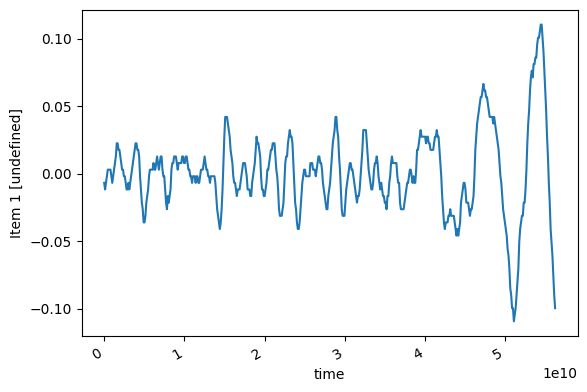

In [3]:
ds[0].plot()

In [4]:
df = ds.to_dataframe()
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5
0 days 00:00:00,-0.006862,-0.000611,0.177047,32.484425,-304.720428
0 days 00:00:00.111803,-0.011746,-0.000611,0.189257,32.292774,-308.553406
0 days 00:00:00.223606,-0.006862,-0.000611,0.189257,32.292774,-308.553406
0 days 00:00:00.335409,-0.001978,0.004273,0.189257,32.292774,-300.887482
0 days 00:00:00.447212,0.002906,0.009157,0.177047,32.292774,-300.887482


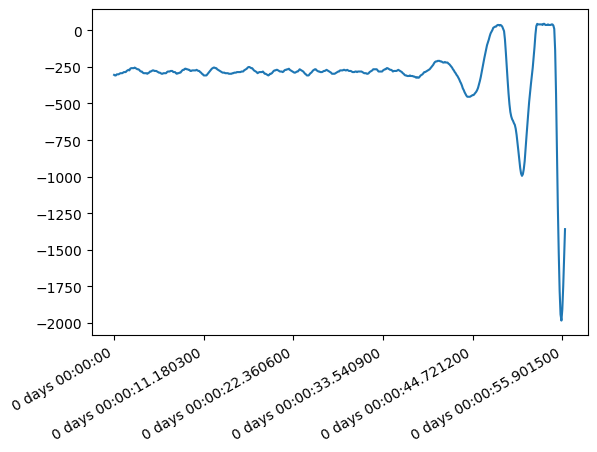

In [5]:
df['Item 5'].plot();

## mikecore

An alternative is to use the underlying library mikecore to read the file.

In [6]:
from mikecore.DfsFileFactory import DfsFileFactory

dfs = DfsFileFactory.DfsGenericOpen("../tests/testdata/eq_relative.dfs0")

Using the `ReadDfs0DataDouble` method you get the data as a numpy array, with the time axis or other type of as the first column.

In [7]:
data = dfs.ReadDfs0DataDouble()

type(data)

numpy.ndarray

Which can be converted to a pandas dataframe. First we extract the name of items (which in this example hapeens to be not very creative).

In [8]:
index_name = "time"
items = [i.Name for i in dfs.ItemInfo]
items = [index_name] + items
items

['time', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5']

In [9]:
import pandas as df

df = df.DataFrame(data, columns=items).set_index(index_name)
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5
time,,,,,
0.000000,-0.006862,-0.000611,0.177047,32.484425,-304.720428
0.111803,-0.011746,-0.000611,0.189257,32.292774,-308.553406
0.223606,-0.006862,-0.000611,0.189257,32.292774,-308.553406
0.335409,-0.001978,0.004273,0.189257,32.292774,-300.887482
0.447212,0.002906,0.009157,0.177047,32.292774,-300.887482
